In [50]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# データ準備

In [51]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 提出用にidを保持
ids = test['PassengerId']

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 棒グラフ

### 素人

In [53]:
p0 = train[train['Survived'] == 0].groupby('Pclass')['Survived'].count()
p0

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [54]:
p1 = train[train['Survived'] == 1].groupby('Pclass')['Survived'].count()
p1

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

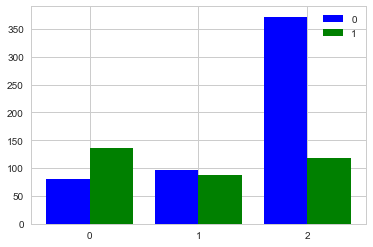

In [55]:
w = 0.4
left = np.arange(len(p0))
plt.bar(left, p0, color='b', width=w, label='0', align="center")
plt.bar(left + w, p1, color='g', width=w, label='1', align="center")

# 凡例を表示
plt.legend(loc="best")

# X軸の目盛りを書き換える
plt.xticks(left + w/2, left)

plt.show()

### プロ

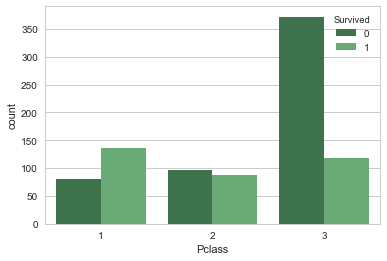

In [56]:
ax = sns.countplot(x="Pclass", hue="Survived", data=train, palette='Greens_d')

## bar_plot & groupby

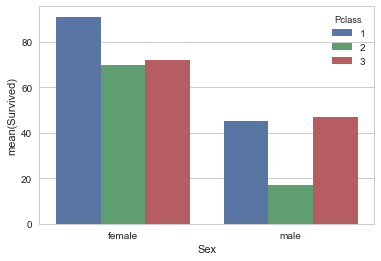

In [57]:
train_grpby_sp = train.groupby( ['Sex', 'Pclass'])
train_data_for_graph = train_grpby_sp['Survived'].aggregate(sum).reset_index()
sns.barplot(x='Sex', y='Survived', hue= 'Pclass', data=train_data_for_graph)

## ぼつ

### ぼつ1

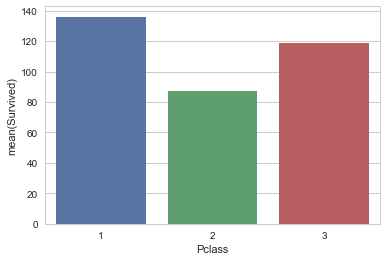

In [58]:
train_grpby = train.groupby( ['Pclass'])
train_data_for_graph = train_grpby['Survived'].aggregate(sum).reset_index()
train_data_for_graph
sns.barplot(x='Pclass', y='Survived', data=train_data_for_graph)

* hueを抜いたらうまくいった。が、なぜか１３０？

### ぼつ2

In [59]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


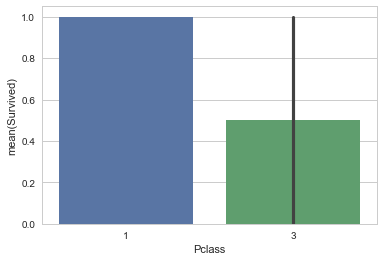

In [60]:
ax = sns.barplot(x="Pclass", y="Survived", data=train[:3])

0.6って何？ => train[:3]とかしてみるとわかった。平均だ。ってか書いてあるし。

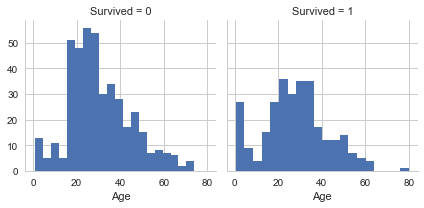

In [61]:
age_survive_hist = sns.FacetGrid(train, col='Survived')
age_survive_hist.map(plt.hist, 'Age', bins=20)



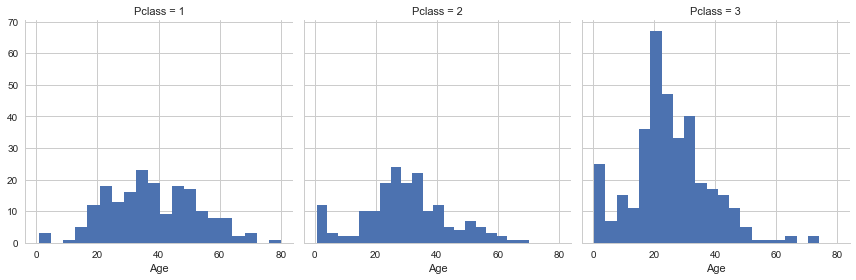

In [62]:
g = sns.FacetGrid(train, col='Pclass', col_wrap=3, size=4)
g.map(plt.hist, 'Age', bins=20);

In [63]:
tips = sns.load_dataset("tips")
tips.groupby("day").count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [67]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [71]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


## 質問！！！！！！

In [74]:
tips.dtypes()

TypeError: 'Series' object is not callable

In [ ]:
tips = tips.drop(tips[tips.day == 'Fri'].index).reset_index()
tips
#tips.groupby('day').count()
#tips = tips[tips.day != 'Thur']


In [ ]:
tips.day

In [ ]:
ax = sns.barplot(x='day', y="total_bill", data=tips)